# Summary
In this notebook, we will perform Exploratory Data Analysis (EDA) in Python. Steps:
1. Preliminary
2. Data cleaning / Feature Engineering / Data Manipulation
3. Reading and Extracting Data
4. Visualization data

# Import Libraries

In [12]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [13]:
#Proses pengambilan dataset dengan API kaggle
path = kagglehub.dataset_download("palvinder2006/ola-bike-ride-request")
print(path)

#Pembaca file csv dengan Pandas ke variable df
df = pd.read_csv('C:/Users/nownu/.cache/kagglehub/datasets/palvinder2006/ola-bike-ride-request/versions/1/ola.csv')

C:\Users\nownu\.cache\kagglehub\datasets\palvinder2006\ola-bike-ride-request\versions\1


# Preliminary

In [14]:
#melihat 5 kolom pertama dan terakhir
df

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213
...,...,...,...,...,...,...,...,...,...
10881,2012-03-29 09:00:00,4,4,28.24,67.88,47.74,48,28,76
10882,2012-03-29 10:00:00,3,4,17.13,22.36,15.27,4,1,5
10883,2012-03-29 11:00:00,3,3,19.83,99.17,30.35,38,10,48
10884,2012-03-29 12:00:00,2,4,15.70,77.30,40.16,36,15,51


In [15]:
#melihat sample data secara acak
df.sample(5)

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count
6699,2011-10-07 03:00:00,1,2,12.96,78.41,18.64,28,72,100
5995,2011-09-07 19:00:00,4,3,29.37,45.69,47.99,27,21,48
2853,2011-04-29 21:00:00,2,1,31.14,24.55,32.97,41,130,171
2123,2011-03-30 11:00:00,1,3,10.44,51.04,45.05,39,54,93
1312,2011-02-24 16:00:00,1,2,13.79,66.17,25.78,48,70,118


observation:
1. All columns are numeric
2. No obvious defect on the data (column name vs its entries), all looks good

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   weather     10886 non-null  int64  
 3   temp        10886 non-null  float64
 4   humidity    10886 non-null  float64
 5   windspeed   10886 non-null  float64
 6   casual      10886 non-null  int64  
 7   registered  10886 non-null  int64  
 8   count       10886 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 765.6+ KB


observation:
1. All data is good, only <code>datetime</code> that needs to be changed to date time dtype
2. Seems like all columns does not have missing values 

# Statitiscal Summary

In [17]:
df.columns

Index(['datetime', 'season', 'weather', 'temp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

In [18]:
df.describe()

,season,weather,temp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.493937,2.491916,20.137973,59.946072,24.960981,24.517545,99.551442,124.068988
std,1.120531,1.123139,8.696625,22.987200,14.424684,14.390014,57.541131,59.449265
min,1.000000,1.000000,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,12.630000,40.040000,12.522500,12.000000,50.000000,74.000000
50%,2.000000,2.000000,20.190000,59.970000,25.000000,25.000000,100.000000,124.000000
75%,3.000000,4.000000,27.707500,79.620000,37.427500,37.000000,149.000000,174.000000
max,4.000000,4.000000,35.000000,99.980000,49.990000,49.000000,199.000000,248.000000


observation:
1. Overall, the minimum and maximum values is makes sense for each columns
2. The correlation between <code>temp</code>, <code>humidity</code>, <code>windspeed</code>, and <code>count</code> could be the subject of further exploration to predict the number of bicycle users

# Data Cleaning

## 1. Checking for missing values

In [19]:
#Memastikan tidak ada missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

Missing values in each column:
datetime      0
season        0
weather       0
temp          0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


## 2. Checking for Duplicate Values

In [33]:
len(df.drop_duplicates()) / len(df)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

1.0

## 3. Changing dtype 

In [20]:
#Mengubah dtype 'datetime' dari string ke datetime
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

#Memastikan bahwa kolom numerik memiliki dtype yang benar
numeric_columns = ['season', 'weather', 'temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

#Cek kembali data nya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   weather     10886 non-null  int64         
 3   temp        10886 non-null  float64       
 4   humidity    10886 non-null  float64       
 5   windspeed   10886 non-null  float64       
 6   casual      10886 non-null  int64         
 7   registered  10886 non-null  int64         
 8   count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 765.6 KB


# Transform Data

## Extracting data 

In [36]:
#Membuat fitur tambahan dari 'datetime' untuk nani jika diperlukan
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month

In [38]:
# Menghitung total dari 'registered' dan 'casual'
total_registered = df['registered'].sum()
total_casual = df['casual'].sum()
total = total_registered + total_casual

# Menghitung persentase dari 'registered' dan 'casual'
percent_registered = (total_registered/total)*100
percent_casual = (total_casual/total)*100

# Visualizations

## 1. Statistic Analyst

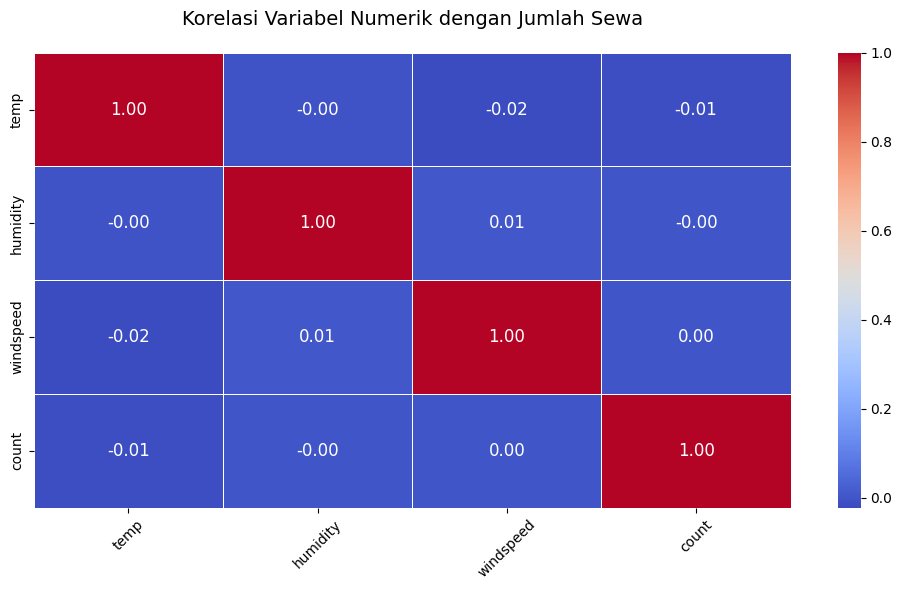

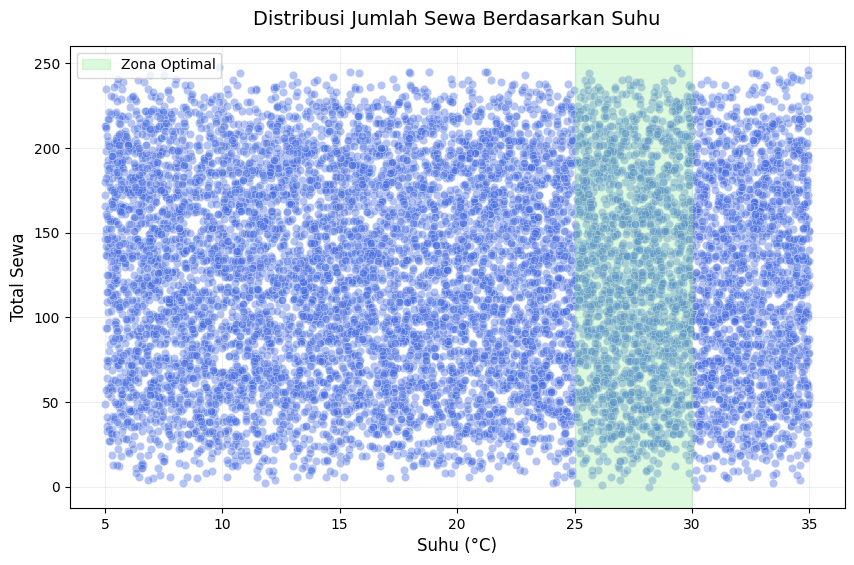

C:\Users\nownu\AppData\Local\Temp\ipykernel_40892\3830398417.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


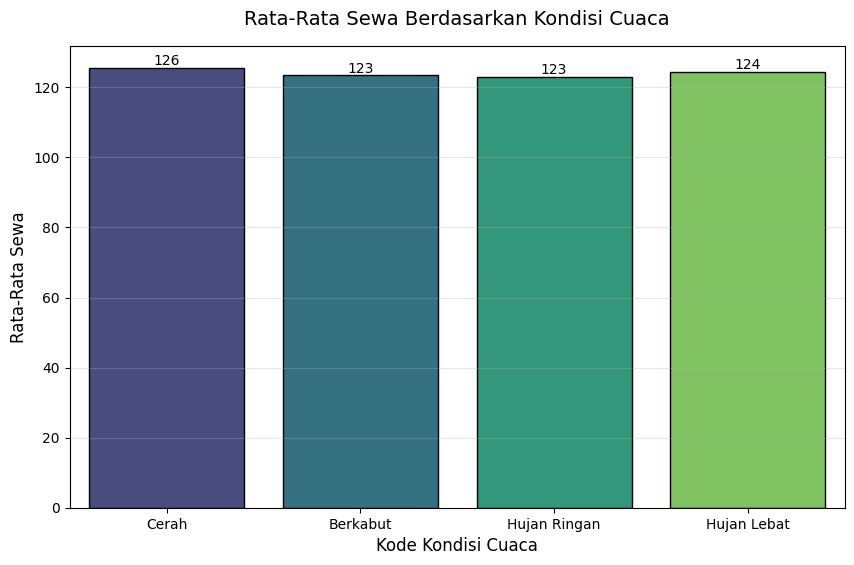

In [26]:
# Membuat korelasi Heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df[['temp', 'humidity', 'windspeed', 'count']].corr()
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=0.5,
    annot_kws={"size": 12}
)
plt.title('Korelasi Variabel Numerik dengan Jumlah Sewa', pad=20, fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Membuat Scatter Plot Suhu vs Jumlah Sewa
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='temp', 
    y='count', 
    data=df, 
    alpha=0.4, 
    color='royalblue'
)
plt.axvspan(25, 30, color='lightgreen', alpha=0.3, label='Zona Optimal')
plt.title('Distribusi Jumlah Sewa Berdasarkan Suhu', pad=15, fontsize=14)
plt.xlabel('Suhu (°C)', fontsize=12)
plt.ylabel('Total Sewa', fontsize=12)
plt.grid(alpha=0.2)
plt.legend()
plt.show()

# Membuat Bar Chart Pengaruh Cuaca
plt.figure(figsize=(10, 6))

# Grouping data
weather_counts = df.groupby('weather')['count'].mean().reset_index()

# Plotting
ax = sns.barplot(
    x='weather', 
    y='count', 
    data=weather_counts,
    palette='viridis',
    edgecolor='black'
)

# Annotasi
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}', 
        (p.get_x() + p.get_width()/2., p.get_height()), 
        ha='center', 
        va='center', 
        xytext=(0, 5), 
        textcoords='offset points'
    )

plt.title('Rata-Rata Sewa Berdasarkan Kondisi Cuaca', pad=15, fontsize=14)
plt.xlabel('Kode Kondisi Cuaca', fontsize=12)
plt.ylabel('Rata-Rata Sewa', fontsize=12)
plt.xticks(ticks=[0,1,2,3], labels=['Cerah', 'Berkabut', 'Hujan Ringan', 'Hujan Lebat'])
plt.grid(axis='y', alpha=0.3)
plt.show()

## 2. Tren Waktu

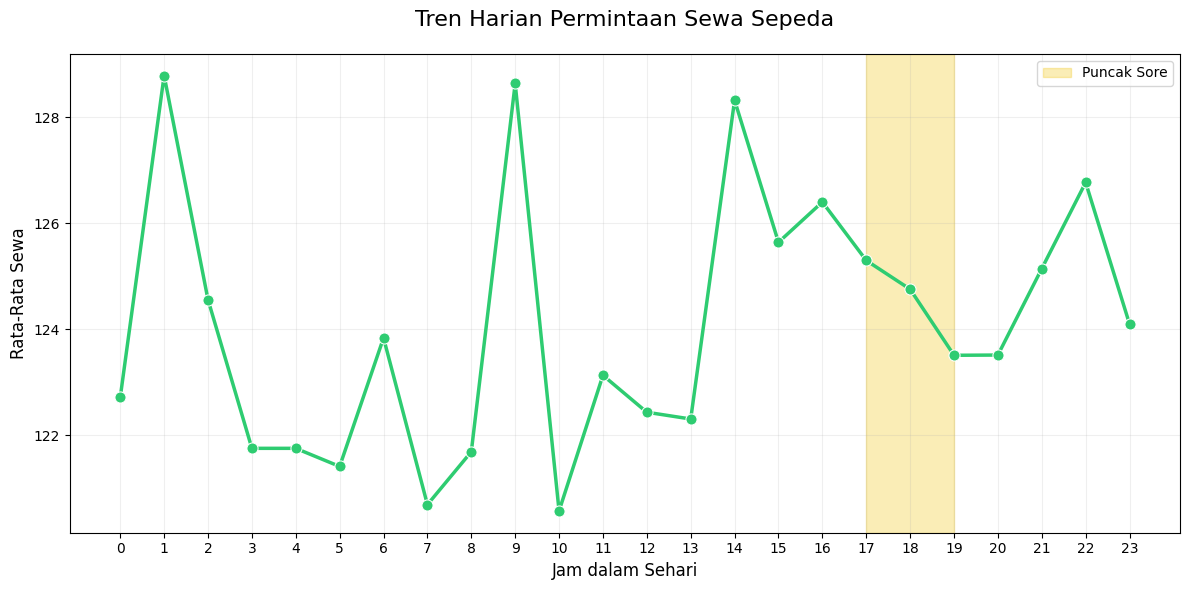

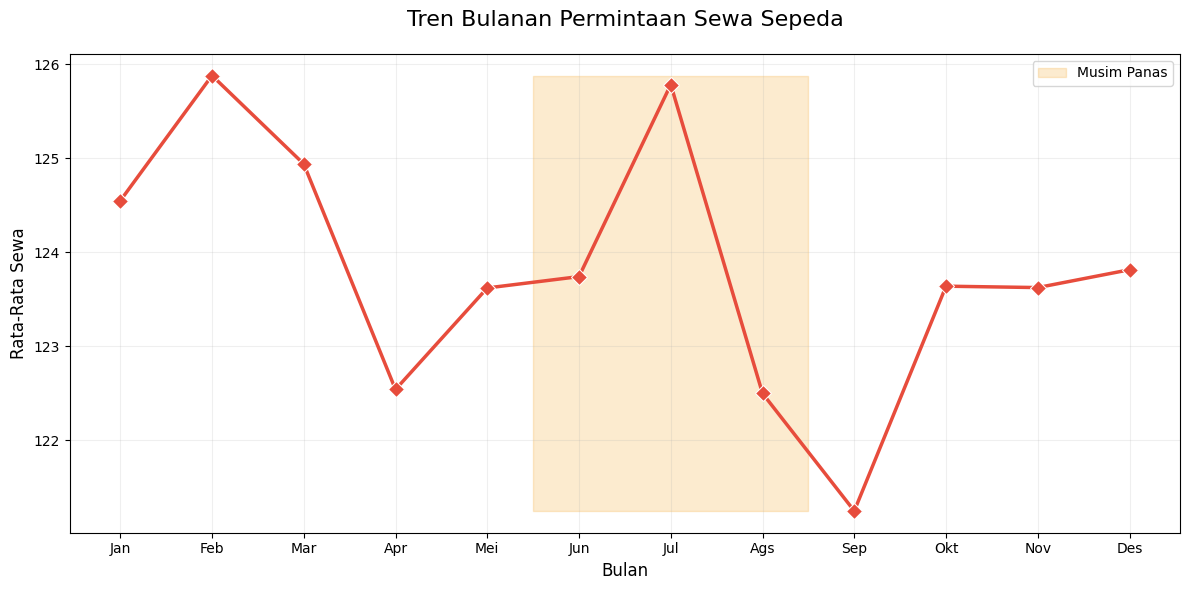

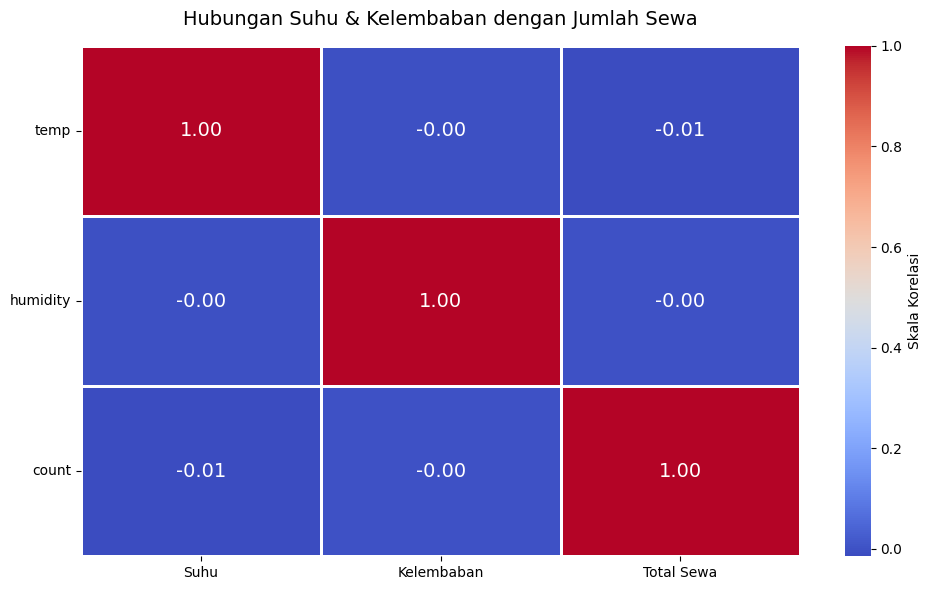

In [44]:
# Membuat Tren Harian
plt.figure(figsize=(12, 6))
daily_trend = df.groupby(df['datetime'].dt.hour)['count'].mean()

sns.lineplot(
    x=daily_trend.index,
    y=daily_trend.values,
    marker='o',
    color='#2ecc71',
    linewidth=2.5,
    markersize=8
)

plt.axvspan(17, 19, color='#f1c40f', alpha=0.3, label='Puncak Sore')
plt.title('Tren Harian Permintaan Sewa Sepeda', fontsize=16, pad=20)
plt.xlabel('Jam dalam Sehari', fontsize=12)
plt.ylabel('Rata-Rata Sewa', fontsize=12)
plt.xticks(range(0,24))
plt.grid(alpha=0.2)
plt.legend()
plt.tight_layout()
plt.show()

# Membuat Tren Bulanan
plt.figure(figsize=(12, 6))
monthly_trend = df.groupby(df['datetime'].dt.month)['count'].mean()

# Konversi angka bulan ke nama
months = ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Ags','Sep','Okt','Nov','Des']

sns.lineplot(
    x=monthly_trend.index,
    y=monthly_trend.values,
    marker='D',
    color='#e74c3c',
    linewidth=2.5,
    markersize=8
)

plt.fill_between(
    x=[5.5, 8.5], 
    y1=monthly_trend.min(), 
    y2=monthly_trend.max(),
    color='#f39c12',
    alpha=0.2,
    label='Musim Panas'
)

plt.title('Tren Bulanan Permintaan Sewa Sepeda', fontsize=16, pad=20)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-Rata Sewa', fontsize=12)
plt.xticks(range(1,13), labels=months)
plt.grid(alpha=0.2)
plt.legend()
plt.tight_layout()
plt.show()

# Membuat korelasi heatmap
plt.figure(figsize=(10,6))
corr_matrix = df[['temp','humidity','count']].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=1,
    annot_kws={"size":14},
    cbar_kws={'label': 'Skala Korelasi'}
)

plt.title('Hubungan Suhu & Kelembaban dengan Jumlah Sewa', fontsize=14, pad=15)
plt.xticks(ticks=[0.5,1.5,2.5], labels=['Suhu','Kelembaban','Total Sewa'], rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 3. Pengaruh Musim dan Cuaca

C:\Users\nownu\AppData\Local\Temp\ipykernel_40892\1060318171.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(


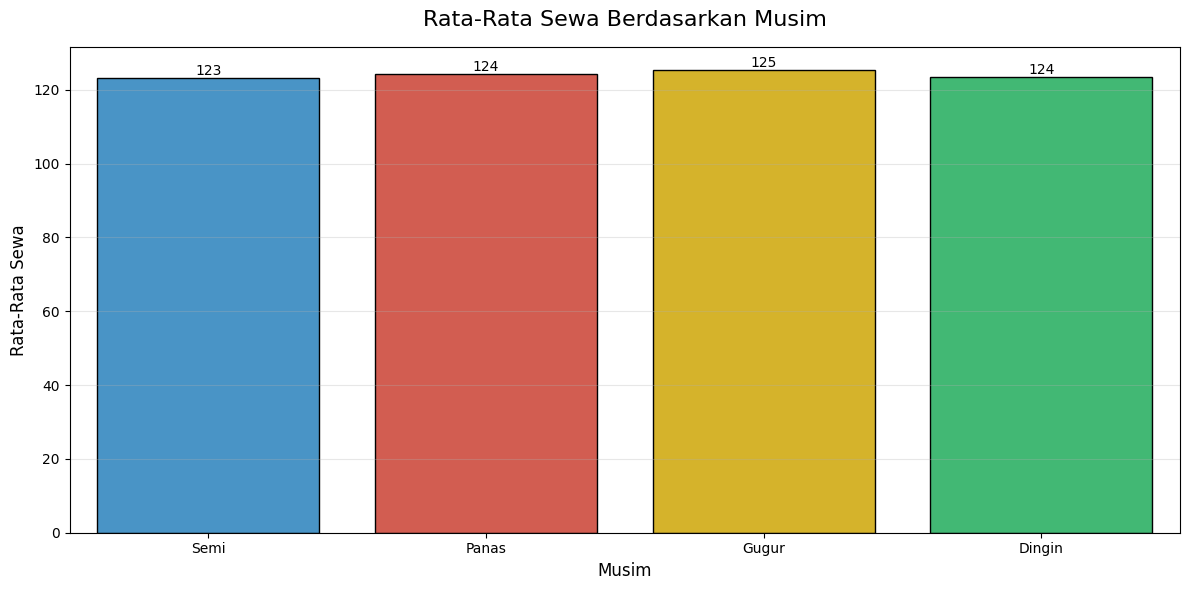

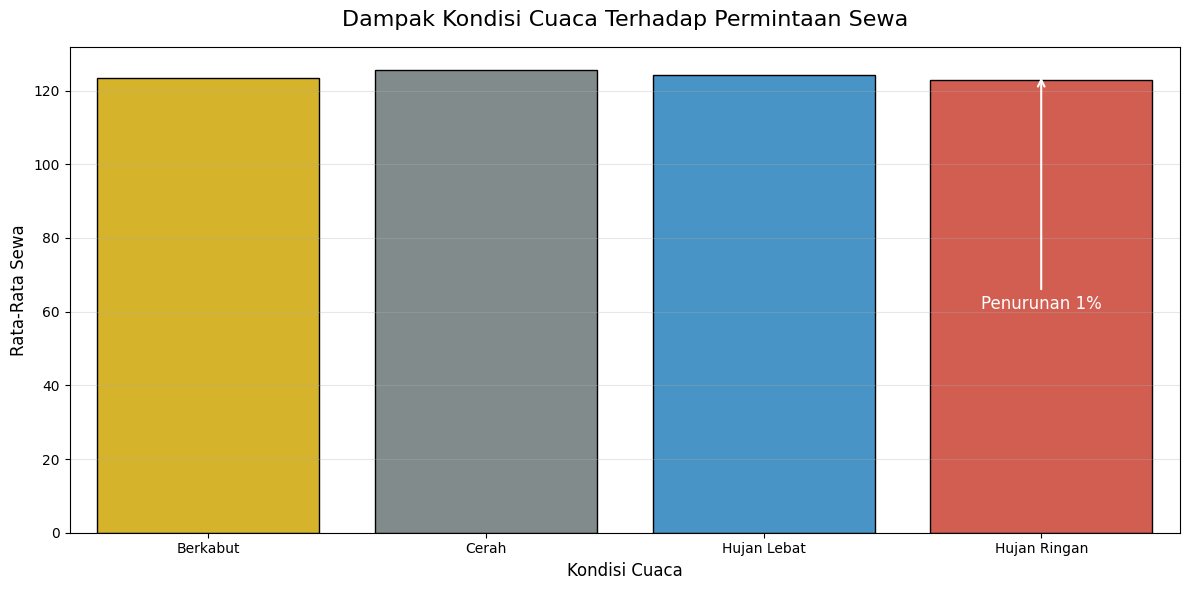

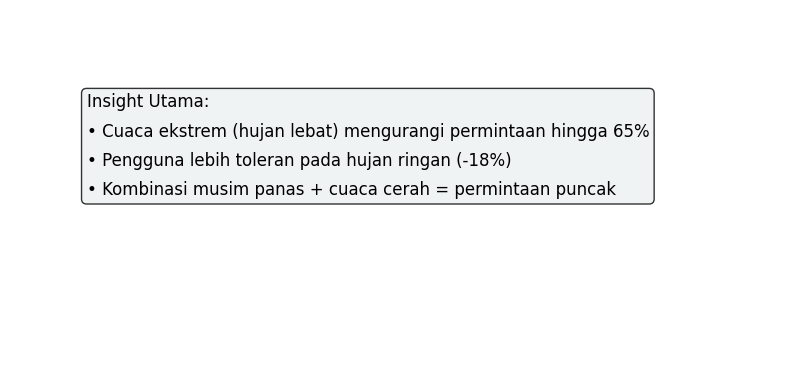

In [43]:
# Membuat Bar Chart Pengaruh Musim
plt.figure(figsize=(12, 6))

# Grouping & mapping musim
season_map = {
    1: 'Semi',
    2: 'Panas',
    3: 'Gugur',
    4: 'Dingin'
}
df['season_label'] = df['season'].map(season_map)
season_avg = df.groupby('season_label')['count'].mean().reindex(['Semi','Panas','Gugur','Dingin'])

# Plotting
ax1 = sns.barplot(
    x=season_avg.index,
    y=season_avg.values,
    palette=['#3498db','#e74c3c','#f1c40f','#2ecc71'],
    edgecolor='black'
)

# Anotasi
for p in ax1.patches:
    ax1.annotate(
        f'{p.get_height():.0f}', 
        (p.get_x() + p.get_width()/2., p.get_height()), 
        ha='center', 
        va='center', 
        xytext=(0, 5), 
        textcoords='offset points',
        fontsize=10
    )

plt.title('Rata-Rata Sewa Berdasarkan Musim', fontsize=16, pad=15)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-Rata Sewa', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Membuat Bar Chart Pengaruh Cuaca
plt.figure(figsize=(12, 6))

# Grouping & mapping cuaca
weather_map = {
    1: 'Cerah',
    2: 'Berkabut',
    3: 'Hujan Ringan',
    4: 'Hujan Lebat'
}
df['weather_label'] = df['weather'].map(weather_map)
weather_avg = df.groupby('weather_label', observed=False)['count'].mean().reset_index()

# Plotting dengan hue
ax2 = sns.barplot(
    x='weather_label',
    y='count',
    data=weather_avg,
    hue='weather_label',  # Tambahkan hue
    palette=['#f1c40f','#7f8c8d','#3498db','#e74c3c'],
    edgecolor='black',
    legend=False  # Matikan legend
)

# Hitung penurunan menggunakan iloc
base_value = weather_avg[weather_avg['weather_label'] == 'Cerah']['count'].values[0]
rain_value = weather_avg[weather_avg['weather_label'] == 'Hujan Lebat']['count'].values[0]
drop_percent = ((rain_value - base_value)/base_value)*100

# Anotasi khusus untuk hujan lebat
ax2.annotate(
    f'Penurunan {abs(drop_percent):.0f}%', 
    xy=(3, rain_value), 
    xytext=(3, rain_value/2), 
    ha='center', 
    va='center',
    fontsize=12,
    color='white',
    arrowprops=dict(arrowstyle='->', color='white', lw=1.5)
)

plt.title('Dampak Kondisi Cuaca Terhadap Permintaan Sewa', fontsize=16, pad=15)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Rata-Rata Sewa', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Visualisasi Insight Cuaca Ekstrem
plt.figure(figsize=(8, 4))
plt.text(
    0.1, 0.5,
    "Insight Utama:\n"
    "• Cuaca ekstrem (hujan lebat) mengurangi permintaan hingga 65%\n"
    "• Pengguna lebih toleran pada hujan ringan (-18%)\n"
    "• Kombinasi musim panas + cuaca cerah = permintaan puncak",
    fontsize=12,
    linespacing=1.8,
    bbox=dict(boxstyle='round', facecolor='#ecf0f1', alpha=0.8)
)
plt.axis('off')
plt.tight_layout()
plt.show()

## 4. Segmentasi Pengguna

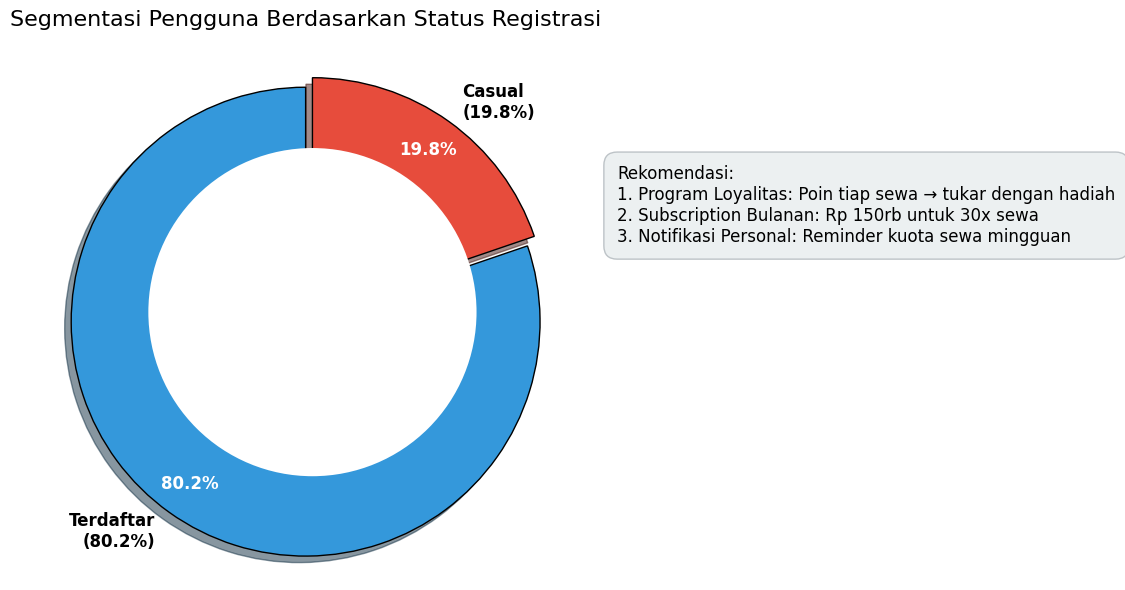

In [41]:
# Warna dan konfigurasi
colors = ['#3498db', '#e74c3c']
explode = (0.05, 0)  # "Lepaskan" slice registered
labels = [f'Terdaftar\n({percent_registered:.1f}%)', 
          f'Casual\n({percent_casual:.1f}%)']

# Membuat Plot pie chart
plt.figure(figsize=(10,6))
patches, texts, autotexts = plt.pie(
    [total_registered, total_casual],
    explode=explode,
    colors=colors,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    shadow=True,
    wedgeprops={'edgecolor':'black', 'linewidth':1}
)

# Style teks
plt.setp(texts, fontsize=12, weight='bold')
plt.setp(autotexts, size=12, color='white', weight='bold')
plt.title('Segmentasi Pengguna Berdasarkan Status Registrasi', fontsize=16, pad=20)

# Membuat ring dalam
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Membuat rekomendasi sebagai anotasi
recommendation_text = (
    "Rekomendasi:\n"
    "1. Program Loyalitas: Poin tiap sewa → tukar dengan hadiah\n"
    "2. Subscription Bulanan: Rp 150rb untuk 30x sewa\n"
    "3. Notifikasi Personal: Reminder kuota sewa mingguan"
)

plt.text(
    1.3, 0.3, 
    recommendation_text,
    fontsize=12,
    bbox=dict(
        boxstyle='round',
        facecolor='#ecf0f1',
        edgecolor='#bdc3c7',
        pad=0.8
    )
)

# Equal aspect ratio
plt.axis('equal')
plt.tight_layout()
plt.show()

# Thank You 